In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# ABOUT THIS NOTEBOOK

## Created for Kaggle playground series season 3, episode 21 - 8.26.23
## Part I
This notebooks will be in two sections 1) EDA and 2) Predictions, first will mostly consist of making plots and cleaning the data. And when the data is ready we can feed to the model to prediction.

In [3]:
df = pd.read_csv('sample_submission.csv')

In [4]:
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [ ]:
df.isna().any()

OK we don't have any null or na values.

### The official kaggle explanation
> This is a very different type of challenge! For this challenge, your task is to improve a dataset that is being used to train a random forest model; in other words, your submission will be training data, not predictions. A random forest model will be trained on your submission, used to make predictions, and then those predictions will be used to generate your score.

> The dataset for this competition is a synthetic dataset based off of the Dissolved oxygen prediction in river water dataset. You are free to use the original in any way that you find useful.

> Please see important information on the Evaluation tab about the model that will be trained on your submitted data.

> Good luck!

Now we have the current dataset which has only data from 7 stations and it is used to build a random forest model. __So first we need to create a Random Forest to compare the output__ and then augment the data by adding 8th station to df and running it again by the same random forest (or another) to see the differences.

Let's create a random forest model.

In [8]:
indicators = ['O2', 'NH4', 'NO2', 'NO3', 'BOD5']

In [9]:
def get_seven_stations(indicator):
    col_names = [indicator + '_' + str(i) for i in range(1, 8)]
    return col_names

In [10]:
get_seven_stations(indicators[4])

['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']

In [14]:
oxgen_col = get_seven_stations(indicators[0])

In [15]:
df[oxgen_col]

,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7
0,7.500,9.000,9.545,9.265,8.110,8.430,7.150
1,13.533,40.900,8.770,9.265,6.015,10.070,7.150
2,3.710,5.420,8.770,9.265,4.550,10.070,7.150
3,8.700,8.100,9.500,9.200,5.200,8.670,6.670
4,8.050,8.650,7.960,9.265,3.290,10.070,7.150
...,...,...,...,...,...,...,...
3495,6.250,8.300,7.795,9.265,5.690,8.555,6.335
3496,6.630,6.630,8.370,7.600,0.636,8.430,7.150
3497,8.367,8.433,8.770,6.170,5.800,10.400,7.200
3498,10.000,6.630,9.545,9.265,3.290,8.980,2.310


In [16]:
np.corrcoef(df['O2_1'],df['O2_2'])

array([[1.        , 0.20475417],
       [0.20475417, 1.        ]])

In [17]:
def corr (x,y):
    return np.corrcoef(x, y) [0][1]

def show_corr(df, a, b):
    x,y = df [a], df[b]
    plt.scatter (x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr (x, y) : .2f}')

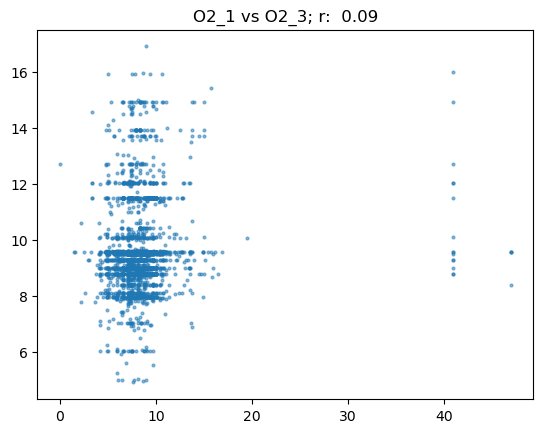

In [18]:
show_corr(df, 'O2_1','O2_3')

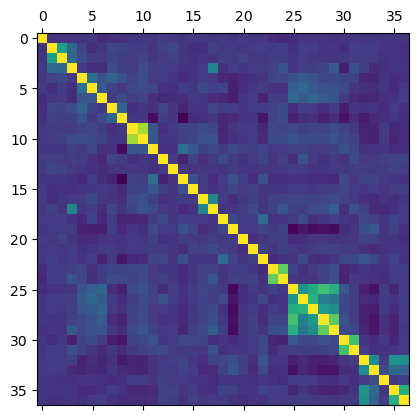

In [19]:
plt.matshow(df.corr())
plt.show()

I thought maybe there was a correlation between perhaps oxygen and nitrogen dioxide but there aren't any power connections, except for nitrate.

Let's check to TODO:

- [x] Look at the big picture.
- [x] Get the data.
- [x] Discover and visualize the data to gain insights.
- [ ] Prepare the data for Machine Learning algorithms.
- [ ] Select a model and train it.
- [ ] Fine-tune your model.
- [ ] Present your solution.
- [ ] ~~Launch, monitor, and maintain your system.~~

### NOTE
This is part is quite useful, since it was the part where I learnt how to index columns, obviuosly with iloc. I wonder if it is also possible with 'loc'?

Another way which I thought up was to select like `df.iloc[:, 0]` and `df.iloc[:, 2:37]` and then add them to a big X df. More info on column based indexing on [Pandas Site](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

In [20]:
inx = np.ones((37))

In [21]:
inx[1] = 0

In [22]:
x_full = df.iloc[:, inx == True]

In [23]:
y_full = df.iloc[:, 1]
y_full.any() != df['target'].any()

False

In [24]:
np.max(y_full)

65.93

In [25]:
np.min(y_full)

# TODO test normalization

1.3

In [26]:
# Splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [28]:
from sklearn.metrics import mean_squared_error

for i in range(0, 5):
    x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2)
    
    rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

    rf.fit(x_train, y_train)

    rf_preds_train = rf.predict(x_train)
    rf_preds = rf.predict(x_test)
    mse_train = mean_squared_error(y_train, rf_preds_train)
    mse_test = mean_squared_error(y_test, rf_preds)

    print(f'MSE for training dataset [{i+1}] is: {mse_train}')
    print(f'MSE for test dataset [{i+1}] is: {mse_test}\n')

MSE for training dataset [1] is: 0.9764745255657165
MSE for test dataset [1] is: 0.9210224994914458

MSE for training dataset [2] is: 0.9076091351113943
MSE for test dataset [2] is: 1.1193651709614196

MSE for training dataset [3] is: 0.9401392526815326
MSE for test dataset [3] is: 1.260121541406949

MSE for training dataset [4] is: 0.936307520194076
MSE for test dataset [4] is: 1.1494193319839028

MSE for training dataset [5] is: 0.9078521956657922
MSE for test dataset [5] is: 1.59022852652687



MSE for training dataset [1] is: 0.8866603327584299
MSE for test dataset [1] is: 1.5932736251233603

MSE for training dataset [2] is: 0.9360571125125997
MSE for test dataset [2] is: 1.1064419699076584

MSE for training dataset [3] is: 0.9078948819808679
MSE for test dataset [3] is: 1.276288024059143

MSE for training dataset [4] is: 0.9498894585142702
MSE for test dataset [4] is: 0.9498135555848811

MSE for training dataset [5] is: 0.7531009828761299
MSE for test dataset [5] is: 4.975854847543697


Error for training set is fairly the same in all 5 distributions of data, but MSE for test data set varys a lot.

In [29]:
len(y_test) == len(rf_preds)

True

In [30]:
err_values = []

for i in y_test:
    err = (y_test - rf_preds) ** 2
    err_values.append(err)
err

104     0.107226
685     0.347921
2693    0.057730
727     0.091765
1500    0.356540
          ...   
1299    1.032134
2723    0.080810
2465    0.778421
1128    0.010176
1670    0.585263
Name: target, Length: 700, dtype: float64

In [34]:
imporatnces = rf.feature_importances_

In [35]:
len(imporatnces)

36

([<matplotlib.axis.XTick at 0x7f8e3ea59300>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35')])

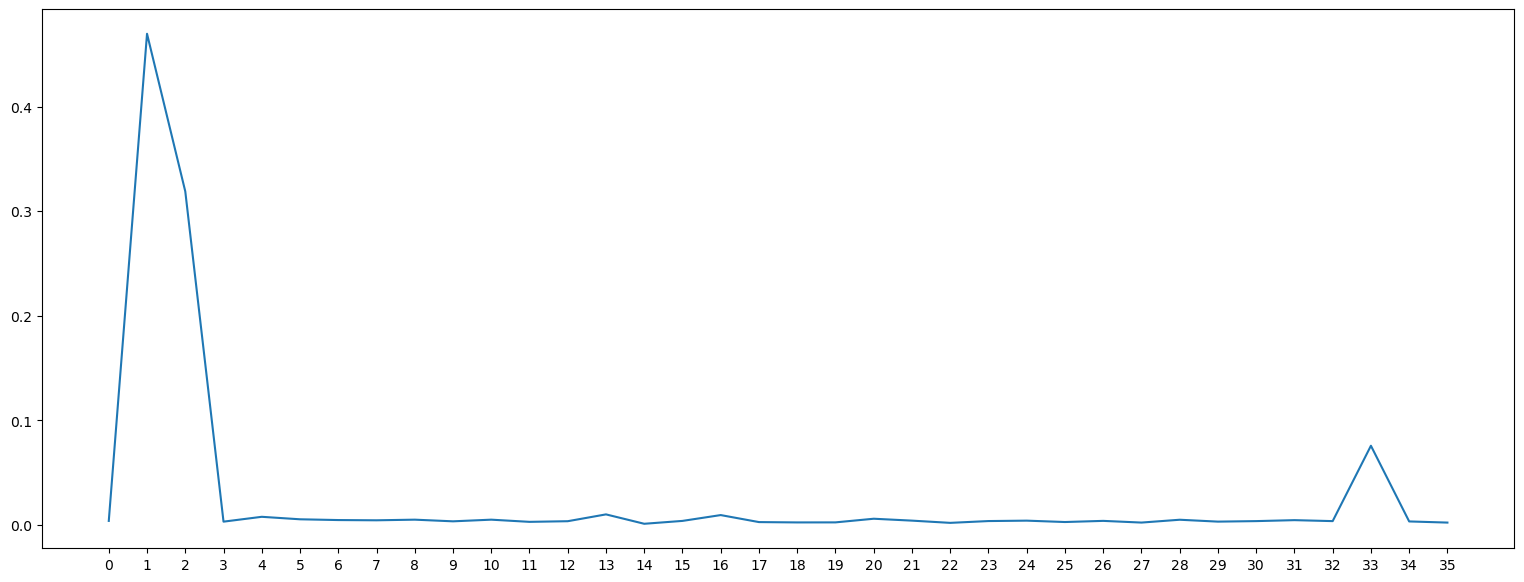

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(19, 7))
plt.plot(imporatnces)
plt.xticks(np.arange(0, 36, step=1))

So the most importance columns are 2, 3, 34. Let's see what are these?

In [37]:
imporatnces = pd.Series(imporatnces)

In [38]:
imporatnces.sort_values(ascending=False, inplace=True)

In [39]:
imporatnces[imporatnces > imporatnces.mean()]

1     0.469775
2     0.319029
33    0.075739
dtype: float64

In [40]:
x_full.columns[[2, 3, 34]]

Index(['O2_2', 'O2_3', 'BOD5_6'], dtype='object')

## Part II

Now I am going to train a Random Forest Regresson with only these three features and let's see how much MSE goes up? This will help to realize the real loss or lack of it by other feautres, maybe we could also combine other features imporatnce and compare but this is more fun.

### 5 Features

In [67]:
minimal_train_data = []
minimal_test_data = []

for i in range(3, 18):
    minimal_inx = np.zeros_like(x_train.columns)
    minimal_inx[imporatnces[:i].index] = 1
    minimal_inx = minimal_inx == 1
    minimal_train_data.append(x_train.iloc[:, minimal_inx])
    minimal_test_data.append(x_test.iloc[:, minimal_inx])

In [68]:
all_features_mse = 1.3228116414285722


for i in range(0, len(minimal_test_data)):
    minimal_rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
    
    
    minimal_rf.fit(minimal_train_data[i], y_train)
    minimal_preds = minimal_rf.predict(minimal_test_data[i])
    mse = mean_squared_error(y_test, minimal_preds)
    print(f'For the {i+3} features the mse is: {mse}')
    print(f'Compare to 36 features mse it is: ')
    print(f'{(all_features_mse-mse)}\n')

For the 3 features the mse is: 2.6567108978191887
Compare to 36 features mse it is: 
-1.3338992563906165

For the 4 features the mse is: 3.7212740496406216
Compare to 36 features mse it is: 
-2.3984624082120494

For the 5 features the mse is: 2.724471138510338
Compare to 36 features mse it is: 
-1.401659497081766

For the 6 features the mse is: 2.694019734683224
Compare to 36 features mse it is: 
-1.3712080932546518

For the 7 features the mse is: 2.6935734302077194
Compare to 36 features mse it is: 
-1.3707617887791472

For the 8 features the mse is: 2.682816126092917
Compare to 36 features mse it is: 
-1.3600044846643446

For the 9 features the mse is: 2.6449040343599233
Compare to 36 features mse it is: 
-1.322092392931351

For the 10 features the mse is: 2.645785564796736
Compare to 36 features mse it is: 
-1.3229739233681639

For the 11 features the mse is: 3.6302317570899265
Compare to 36 features mse it is: 
-2.3074201156613543

For the 12 features the mse is: 3.6724067203838375

OK the 36 features version of model had a mse of 1.3228116414285722 and the new (minimal) model has only 1.3232833197493163, only 4 ten-thousandth for 33 extra features. The sweet spot is around 10 features but other than that it would be 5 and 3 features.

## Checking for Outliers

In [82]:
# 5 features

minimal_inx = np.zeros_like(x_train.columns)
minimal_inx[imporatnces[:5].index] = 1
minimal_inx = minimal_inx == 1
five_f = x_train.iloc[:, minimal_inx]

In [83]:
five_f

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
2931,10.000,8.900,0.38,0.090,8.415
3072,8.900,8.900,0.44,0.050,7.750
3318,4.370,4.980,0.31,0.045,8.415
1549,5.065,8.500,0.28,0.058,2.040
1861,9.700,8.500,0.28,0.040,6.750
...,...,...,...,...,...
1250,4.980,5.420,0.31,0.027,8.000
3109,7.700,6.025,0.38,0.050,8.025
2366,9.400,7.400,0.28,0.080,8.400
361,10.000,8.760,0.31,0.105,6.750


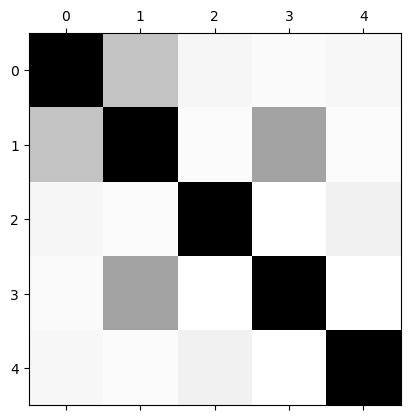

In [84]:
plt.matshow(five_f.corr(), cmap='gray_r')
plt.show()

In [85]:
five_f.describe()

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,8.249540,9.303004,0.470078,0.111298,7.881035
std,3.228676,6.865057,0.315112,0.191535,3.834703
min,0.000000,0.000000,0.052000,0.006000,2.020000
25%,7.100000,7.300000,0.310000,0.040000,5.750000
50%,7.900000,8.300000,0.380000,0.060000,7.500000
75%,9.100000,8.733000,0.429000,0.095000,8.400000
max,46.950000,65.950000,2.680000,2.347000,82.450000


OK there are some jarring outliers, maybe let's get the ratio of how much data is outside of the IQR?

In [86]:
O21_cutoff = (five_f['O2_1'].quantile(0.9))
O22_cutoff = (five_f['O2_2'].quantile(0.9))
NH4_cutoff = (five_f['NH4_6'].quantile(0.9))
NO2_cutoff = (five_f['NO2_2'].quantile(0.9))
BOD5_cutoff = (five_f['BOD5_5'].quantile(0.9))

# Clip the last 10 percentiles

# TODO test normalization

In [87]:
print(len(five_f[five_f['O2_1'] <= O21_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['O2_2'] <= O22_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['NH4_6'] <= NH4_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['NO2_2'] <= NO2_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['BOD5_5'] <= BOD5_cutoff])/len(five_f)* 100)

93.25
90.03571428571429
99.25
90.57142857142857
90.07142857142857


In [88]:
five_f = five_f.copy()

I don't think this kind of mechanical cut off would be beneficial for anything except for NH4_5 and NO2_2

In [89]:
five_f.describe()

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,8.249540,9.303004,0.470078,0.111298,7.881035
std,3.228676,6.865057,0.315112,0.191535,3.834703
min,0.000000,0.000000,0.052000,0.006000,2.020000
25%,7.100000,7.300000,0.310000,0.040000,5.750000
50%,7.900000,8.300000,0.380000,0.060000,7.500000
75%,9.100000,8.733000,0.429000,0.095000,8.400000
max,46.950000,65.950000,2.680000,2.347000,82.450000


(array([2.628e+03, 1.020e+02, 1.200e+01, 5.600e+01, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 2.02 , 10.063, 18.106, 26.149, 34.192, 42.235, 50.278, 58.321,
        66.364, 74.407, 82.45 ]),
 <BarContainer object of 10 artists>)

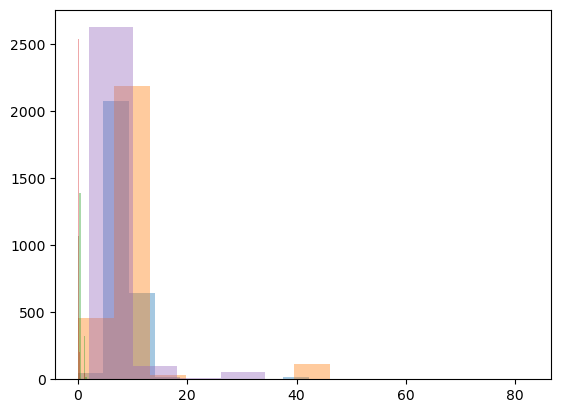

In [90]:
plt.hist(five_f['O2_1'], alpha=0.4)
plt.hist(five_f['O2_2'], alpha=0.4)
plt.hist(five_f['NH4_6'], alpha=0.4)
plt.hist(five_f['NO2_2'], alpha=0.4)
plt.hist(five_f['BOD5_5'], alpha=0.4)

This is a skewed data, log might help us.

In [91]:
n_o2 = np.log1p(five_f['O2_1'])

In [92]:
five_f['O2_1'] = np.log1p(five_f['O2_1'])
five_f['O2_2'] = np.log1p(five_f['O2_2'])
five_f['NH4_6'] = np.log1p(five_f['NH4_6'])
five_f['NO2_2'] = np.log1p(five_f['NO2_2'])
five_f['BOD5_5'] = np.log1p(five_f['BOD5_5'])

(array([1.800e+01, 1.100e+01, 1.302e+03, 1.322e+03, 3.900e+01, 4.700e+01,
        5.100e+01, 8.000e+00, 1.000e+00, 1.000e+00]),
 array([1.10525683, 1.43715591, 1.769055  , 2.10095408, 2.43285316,
        2.76475224, 3.09665132, 3.4285504 , 3.76044949, 4.09234857,
        4.42424765]),
 <BarContainer object of 10 artists>)

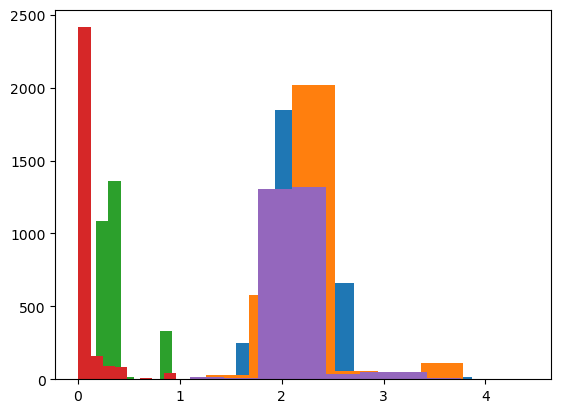

In [94]:
plt.hist(five_f['O2_1'])
plt.hist(five_f['O2_2'])
plt.hist(five_f['NH4_6'])
plt.hist(five_f['NO2_2'])
plt.hist(five_f['BOD5_5'])

In [95]:
five_f

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
2931,2.397895,2.292535,0.322083,0.086178,2.242304
3072,2.292535,2.292535,0.364643,0.048790,2.169054
3318,1.680828,1.788421,0.270027,0.044017,2.242304
1549,1.802535,2.251292,0.246860,0.056380,1.111858
1861,2.370244,2.251292,0.246860,0.039221,2.047693
...,...,...,...,...,...
1250,1.788421,1.859418,0.270027,0.026642,2.197225
3109,2.163323,1.949475,0.322083,0.048790,2.199999
2366,2.341806,2.128232,0.246860,0.076961,2.240710
361,2.397895,2.278292,0.270027,0.099845,2.047693


In [98]:
nrf_r = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

nrf_r.fit(five_f, y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [99]:
five_f_test = minimal_test_data[2]
five_f_test = five_f_test.copy()

In [100]:
five_f_test['O2_1'] = np.log1p(five_f_test['O2_1'])
five_f_test['O2_2'] = np.log1p(five_f_test['O2_2'])
five_f_test['NH4_6'] = np.log1p(five_f_test['NH4_6'])
five_f_test['NO2_2'] = np.log1p(five_f_test['NO2_2'])
five_f_test['BOD5_5'] = np.log1p(five_f_test['BOD5_5'])

In [101]:
nrf_r_pred = nrf_r.predict(five_f_test)

In [102]:
mean_squared_error(y_test, nrf_r_pred)

2.723500187329028

In [103]:
five_f_test

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
2534,2.272126,2.272126,0.826366,0.069526,1.905832
2972,2.397895,2.230014,0.270027,0.037296,2.047693
1788,2.020222,2.251292,0.270027,0.090754,2.242304
1775,2.085672,2.307573,0.270027,0.039221,2.047693
2911,2.251292,2.208274,0.322083,0.099845,1.905832
...,...,...,...,...,...
2469,2.295863,2.244214,0.270027,0.387301,2.047693
3378,2.370244,2.240710,0.356975,0.069526,2.169054
1520,2.073172,2.295863,0.182322,0.045929,1.871802
2468,2.370244,2.292535,0.270027,0.024693,2.163323


In [104]:
return_five = pd.concat([five_f, five_f_test])

In [105]:
return_five = return_five.sort_index()

In [106]:
return_five

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
0,2.140066,2.302585,0.826366,0.048790,2.870452
1,2.676422,3.735286,0.246860,0.858662,1.905832
2,1.549688,1.859418,0.322083,0.048790,2.047693
3,2.272126,2.208274,0.908259,0.048790,2.269028
4,2.202765,2.266958,0.246860,0.108854,2.240710
...,...,...,...,...,...
3495,1.981001,2.230014,0.356975,0.050693,2.162748
3496,2.032088,2.032088,0.826366,0.019803,2.242304
3497,2.237193,2.244214,0.270027,0.032467,2.240710
3498,2.397895,2.032088,0.826366,0.385262,2.047693


In [107]:
df_ex = df.copy()

In [108]:
return_five.round(2)

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
0,2.14,2.30,0.83,0.05,2.87
1,2.68,3.74,0.25,0.86,1.91
2,1.55,1.86,0.32,0.05,2.05
3,2.27,2.21,0.91,0.05,2.27
4,2.20,2.27,0.25,0.11,2.24
...,...,...,...,...,...
3495,1.98,2.23,0.36,0.05,2.16
3496,2.03,2.03,0.83,0.02,2.24
3497,2.24,2.24,0.27,0.03,2.24
3498,2.40,2.03,0.83,0.39,2.05


In [109]:
zero_map = np.zeros(len(df_ex.columns))

In [110]:
imporatnces[:5]

1     0.469775
2     0.319029
33    0.075739
13    0.010084
16    0.009419
dtype: float64

In [111]:
zero_map[[1, 2, 3, 34]] = 1

In [112]:
zero_map = zero_map!=1

In [113]:
df_ex.iloc[:, zero_map] = 0

/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_1062/84186887.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ex.iloc[:, zero_map] = 0


In [114]:
df_ex

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16.645,0,0
1,0,9.10,13.533,40.900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.725,0,0
2,0,8.21,3.710,5.420,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0
3,0,8.39,8.700,8.100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.670,0,0
4,0,8.07,8.050,8.650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,8.08,6.250,8.300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.695,0,0
3496,0,8.09,6.630,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.415,0,0
3497,0,9.95,8.367,8.433,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
3498,0,9.52,10.000,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0


In [115]:
df_ex.to_csv('sub3.csv', index=False)

## PART III
### Target

Now that we know logarithm doesn't help us that much we have to use clipping. First we start by Target.

In [117]:
print(f'Full range: {y_full.max() - y_full.min()}')
print(f'90th percentile: {y_full.quantile(.9)}')
print(f'10th percentile: {y_full.quantile(.1)}')

Full range: 64.63000000000001
90th percentile: 9.68
10th percentile: 7.12


Let's clip the data outside of 90the and 10th percentiles

In [118]:
clipped_y_agg = y_full.clip(7, 10)
clipped_y = y_full.clip(7, 15)

In [119]:
normal_y = (y_full - y_full.mean()) / y_full.std()

In [138]:
x_train_agg, x_test_agg, y_train_agg, y_test_agg = train_test_split(x_full, clipped_y, test_size=0.2)
x_train_clipped, x_test_clipped, y_train_clipped, y_test_clipped = train_test_split(x_full, clipped_y_agg, test_size=0.2)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_full, normal_y, test_size=0.2)
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(x_full, y_full, test_size=0.2)

In [139]:
five_x_train_agg = x_train_agg.iloc[:, imporatnces[:5].index]
five_x_test_agg = x_test_agg.iloc[:, imporatnces[:5].index]

five_x_train_clipped = x_train_clipped.iloc[:, imporatnces[:5].index]
five_x_test_clipped = x_test_clipped.iloc[:, imporatnces[:5].index]

five_x_train_norm = x_train_norm.iloc[:, imporatnces[:5].index]
five_x_test_norm = x_test_norm.iloc[:, imporatnces[:5].index]

five_x_train_raw = x_train_raw.iloc[:, imporatnces[:5].index]
five_x_test_raw = x_test_raw.iloc[:, imporatnces[:5].index]

In [140]:
agg_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

agg_rfr.fit(five_x_train_agg, y_train_agg)
agg_rfr_pred = agg_rfr.predict(five_x_test_agg)
mean_squared_error(y_test_agg, agg_rfr_pred)

0.765122321553859

In [169]:
clip_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

clip_rfr.fit(five_x_train_clipped, y_train_clipped)
clip_rfr_pred = clip_rfr.predict(five_x_test_clipped)
mean_squared_error(y_test_clipped, clip_rfr_pred)

0.535778291771396

In [170]:
norm_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

norm_rfr.fit(five_x_train_norm, y_train_norm)
norm_rfr_pred = norm_rfr.predict(five_x_test_norm)
mean_squared_error(y_test_norm, norm_rfr_pred)

0.6858868573465322

In [143]:
raw_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

raw_rfr.fit(five_x_train_raw, y_train_raw)
raw_rfr_pred = raw_rfr.predict(five_x_test_raw)
mean_squared_error(y_test_raw, raw_rfr_pred)

6.395317938850975

Normalized Target seem to give use the best results

* Aggressive Clipping = 0.7944536347943358
* Clipping = 0.5671247840525266
* Normalized = 0.3590333922067787
* Raw = 1.1812596055750642

-----
Second Time
* Aggressive Clipping (2nd time) = 0.8910968469441664
* Clipping (2nd time) = 0.5401740164556785
* Normalized (2nd time) = 0.3927672782367207
* Raw (2nd time) = 1.3195489301516468

-------
Third Time
* Aggressive Clipping (3rd time) = 0.765122321553859
* Clipping (3rd time) = 0.5357782917713959
* Normalized (3rd time) = 0.3722441788386579
* Raw (3rd time) = 6.395317938850975

Oh wow!
Third time says it all, since all of the values of normalized and clipped data stay around the same value, while the raw data changes frantically. **We have mostly eliminated the volatility of data.** Now we can only focus on clipping and normalization.

Let's check to TODO:

- [x] Look at the big picture.
- [x] Get the data.
- [x] Discover and visualize the data to gain insights.
- [x] Prepare the data for Machine Learning algorithms.
~~- [x] Select a model and train it.~~
~~- [x] Fine-tune your model.~~
- [x] Present your solution.
- [x] Launch, monitor, and maintain your system.

In [171]:
clipped_y_loose = y_full.clip(7, 15)

In [172]:
clipped_y_loose

0       8.59
1       9.10
2       8.21
3       8.39
4       8.07
        ... 
3495    8.08
3496    8.09
3497    9.95
3498    9.52
3499    8.51
Name: target, Length: 3500, dtype: float64

In [173]:
x_train_loose, x_test_loose, y_train_loose, y_test_loose = train_test_split(x_full, clipped_y_loose, test_size=0.2)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_full, normal_y, test_size=0.2)

In [177]:
five_x_train_loose = x_train_loose.iloc[:, imporatnces[:5].index]
five_x_test_loose = x_test_loose.iloc[:, imporatnces[:5].index]

five_x_train_norm = x_train_norm.iloc[:, imporatnces[:5].index]
five_x_test_norm = x_test_norm.iloc[:, imporatnces[:5].index]

In [178]:
y_train_loose

199      7.65
114      8.92
2261     8.74
56       7.00
2569     8.09
        ...  
990      9.51
1586    10.81
614      7.27
3177     8.08
3150     9.12
Name: target, Length: 2800, dtype: float64

In [179]:
five_x_train_loose

,O2_1,O2_2,BOD5_5,NH4_6,NO2_2
199,8.050,7.350,6.750,0.280,0.100
114,7.550,8.565,5.725,0.429,0.050
2261,6.700,7.300,27.500,0.530,0.200
56,6.540,8.600,7.700,0.380,0.095
2569,9.100,8.500,6.750,0.280,0.078
...,...,...,...,...,...
990,8.700,14.900,9.275,0.380,0.030
1586,12.000,8.900,6.750,0.310,0.029
614,8.367,8.433,5.725,0.310,0.047
3177,7.500,8.500,5.725,0.380,0.080


In [181]:
loose_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

loose_rfr.fit(five_x_train_loose, y_train_loose)
loose_rfr_pred = loose_rfr.predict(five_x_test_loose)
mean_squared_error(y_test_loose, loose_rfr_pred)

0.7502271236269918

In [182]:
norm_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

norm_rfr.fit(five_x_train_norm, y_train_norm)
norm_rfr_pred = norm_rfr.predict(five_x_test_norm)
mean_squared_error(y_test_norm, norm_rfr_pred)

0.3236519982515037

Most of the times normal seems to outperform the loose clipping

In [183]:
normal_y

0       0.061603
1       0.332058
2      -0.139912
3      -0.044458
4      -0.214155
          ...   
3495   -0.208852
3496   -0.203549
3497    0.782816
3498    0.554786
3499    0.019179
Name: target, Length: 3500, dtype: float64

In [189]:
x_pass = x_full.iloc[:, imporatnces[:4].index]

In [190]:
df_ex = df.copy()

In [200]:
df_ex[:] = 0
df_ex

/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_1062/2459347210.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ex[:] = 0


,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
df_ex[x_pass.columns] = x_pass

In [202]:
df_ex

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,0,7.500,9.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16.645,0,0
1,0,0,13.533,40.900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.725,0,0
2,0,0,3.710,5.420,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0
3,0,0,8.700,8.100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.670,0,0
4,0,0,8.050,8.650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,6.250,8.300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.695,0,0
3496,0,0,6.630,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.415,0,0
3497,0,0,8.367,8.433,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
3498,0,0,10.000,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0


In [204]:
df_ex['target'] = normal_y

In [206]:
df_ex.to_csv('submissions/sub3.csv', index=False)

In [208]:
df_ex['target'] = clipped_y_loose

In [209]:
df_ex.to_csv('sub4-clip.csv', index=False)